<a href="https://colab.research.google.com/github/AdityaBhatt07/FakeNewsDetection/blob/main/FINAL_FAKE_NEWS_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_curve, auc
)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
import nltk
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download("vader_lexicon")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
uploaded = files.upload()

Saving news_articles.csv to news_articles.csv


In [ ]:
df = pd.read_csv("news_articles.csv")

In [ ]:
print(df.head())
print(df.info())
print(df.shape)

                 author                      published  \
0     Barracuda Brigade  2016-10-26T21:41:00.000+03:00   
1  reasoning with facts  2016-10-29T08:47:11.259+03:00   
2     Barracuda Brigade  2016-10-31T01:41:49.479+02:00   
3                Fed Up  2016-11-01T05:22:00.000+02:00   
4                Fed Up  2016-11-01T21:56:00.000+02:00   

                                               title  \
0  muslims busted they stole millions in govt ben...   
1  re why did attorney general loretta lynch plea...   
2  breaking weiner cooperating with fbi on hillar...   
3  pin drop speech by father of daughter kidnappe...   
4  fantastic trumps  point plan to reform healthc...   

                                                text language  \
0  print they should pay all the back all the mon...  english   
1  why did attorney general loretta lynch plead t...  english   
2  red state  \nfox news sunday reported this mor...  english   
3  email kayla mueller was a prisoner and torture...  

In [ ]:
df.dropna(subset=['text','title','site_url','label'], inplace=True)
df.drop_duplicates(inplace=True)

/tmp/ipython-input-148323032.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", palette="coolwarm")


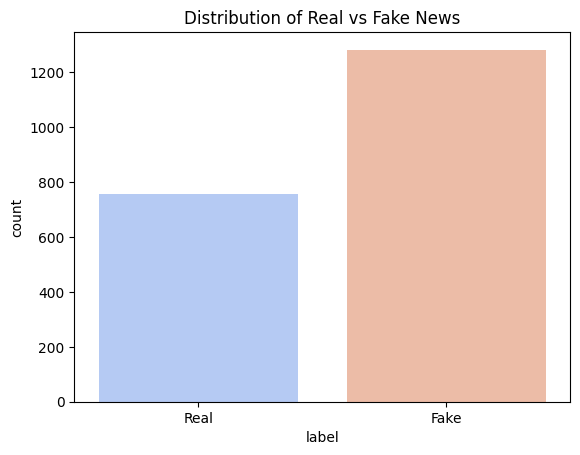

In [ ]:
sns.countplot(data=df, x="label", palette="coolwarm")
plt.title("Distribution of Real vs Fake News")
plt.show()

In [ ]:
source_counts = df.groupby(["site_url","label"]).size().unstack(fill_value=0)
source_counts["Percentage Real (%)"] = (source_counts["Real"] / (source_counts["Real"] + source_counts["Fake"])) * 100
source_counts["Percentage Fake (%)"] = (source_counts["Fake"] / (source_counts["Real"] + source_counts["Fake"])) * 100

sorted_sources = source_counts.sort_values(by="Percentage Fake (%)", ascending=False)
print("Top 10 Least Credible News Sources:")
print(sorted_sources.head(10))

Top 10 Least Credible News Sources:
label                Fake  Real  Percentage Real (%)  Percentage Fake (%)
site_url                                                                 
21stcenturywire.com    24     0                  0.0                100.0
abcnews.com.co          2     0                  0.0                100.0
abeldanger.net         72     0                  0.0                100.0
abovetopsecret.com     53     0                  0.0                100.0
topinfopost.com         2     0                  0.0                100.0
activistpost.com      100     0                  0.0                100.0
adobochronicles.com    13     0                  0.0                100.0
ahtribune.com          68     0                  0.0                100.0
americannews.com        2     0                  0.0                100.0
allnewspipeline.com     1     0                  0.0                100.0


In [ ]:
import nltk
nltk.download('punkt_tab')

stop_words = set(stopwords.words("english"))
title_counter = Counter()
text_counter = Counter()

for index, row in df.iterrows():
    title_words = word_tokenize(str(row["title"]))
    text_words = word_tokenize(str(row["text"]))

    title_words = [word.lower() for word in title_words if word.isalpha() and word.lower() not in stop_words]
    text_words = [word.lower() for word in text_words if word.isalpha() and word.lower() not in stop_words]

    if row["label"] == "Fake":
        title_counter.update(title_words)
        text_counter.update(text_words)

top_keywords_text = text_counter.most_common(20)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


/tmp/ipython-input-2251939438.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(keywords), palette="viridis")


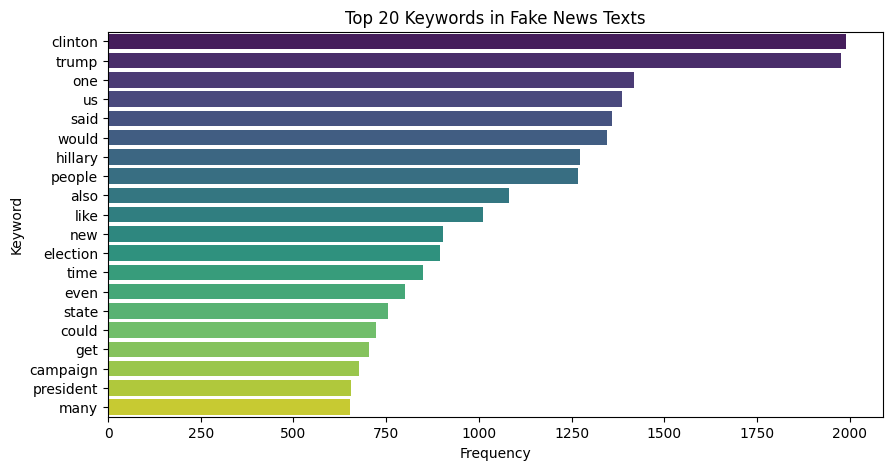

In [ ]:
keywords, counts = zip(*top_keywords_text)
plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(keywords), palette="viridis")
plt.title("Top 20 Keywords in Fake News Texts")
plt.xlabel("Frequency")
plt.ylabel("Keyword")
plt.show()

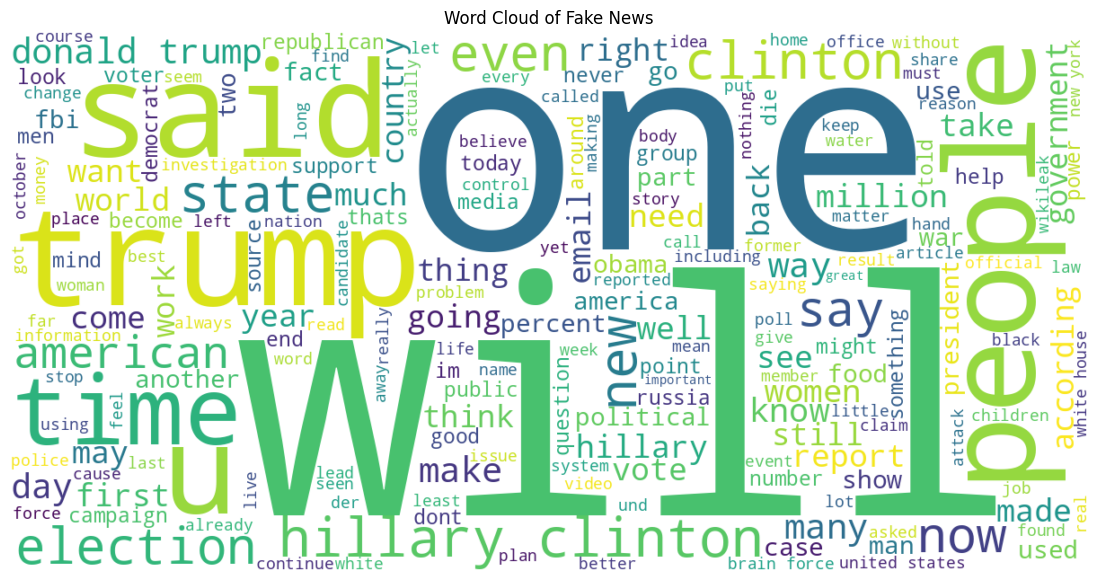

In [ ]:
fake_text = " ".join(df[df["label"] == "Fake"]["text"].astype(str).tolist())
wordcloud = WordCloud(width=1200, height=600, background_color="white").generate(fake_text)
plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Fake News")
plt.show()

In [ ]:
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"\d+", "", text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

df["clean_text"] = df["text"].apply(preprocess_text)


In [ ]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["text"].apply(get_sentiment)

/tmp/ipython-input-1929073898.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Sentiment", palette="Set2")


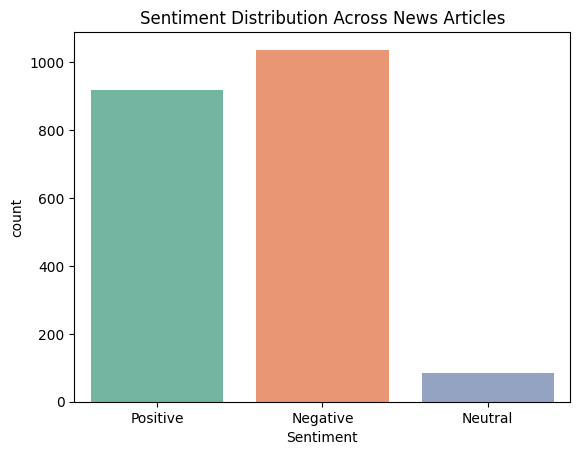

In [ ]:
sns.countplot(data=df, x="Sentiment", palette="Set2")
plt.title("Sentiment Distribution Across News Articles")
plt.show()

In [ ]:
X = df["clean_text"]
y = [1 if label == "Real" else 0 for label in df["label"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [ ]:
def plot_roc_curve(model, X_test, y_test, name):
    try:
        y_prob = model.predict_proba(X_test)[:,1]
    except:
        y_prob = model.decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
def train_and_evaluate(model, name):
    print(f"\n📌 Model: {name}")
    model.fit(X_train_tfidf, y_train)
    predictions = model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, predictions)
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))

    cm = confusion_matrix(y_test, predictions)
    plot_confusion_matrix(cm, f"{name} - Confusion Matrix")
    plot_roc_curve(model, X_test_tfidf, y_test, name)


📌 Model: Logistic Regression
Accuracy: 0.7181372549019608
Confusion Matrix:
 [[247   9]
 [106  46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.96      0.81       256
           1       0.84      0.30      0.44       152

    accuracy                           0.72       408
   macro avg       0.77      0.63      0.63       408
weighted avg       0.75      0.72      0.67       408



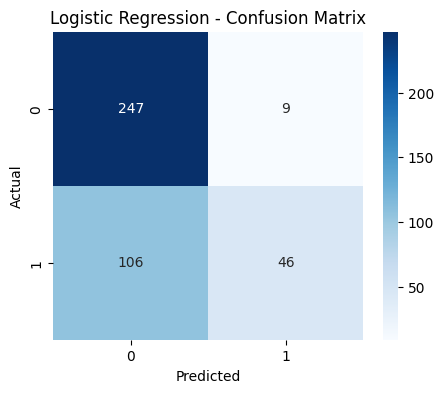

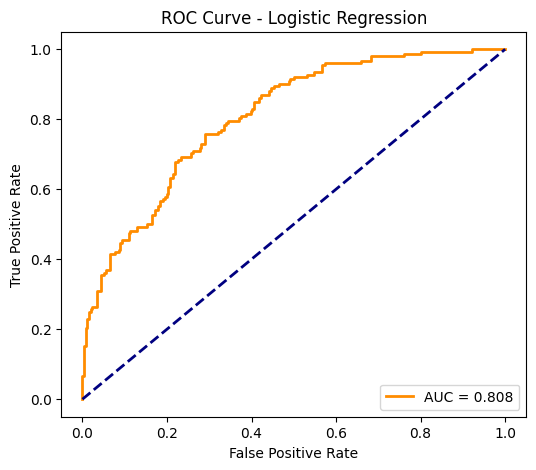


📌 Model: Multinomial Naive Bayes
Accuracy: 0.7083333333333334
Confusion Matrix:
 [[247   9]
 [110  42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.96      0.81       256
           1       0.82      0.28      0.41       152

    accuracy                           0.71       408
   macro avg       0.76      0.62      0.61       408
weighted avg       0.74      0.71      0.66       408



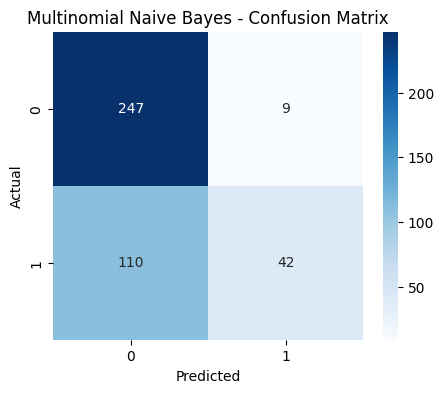

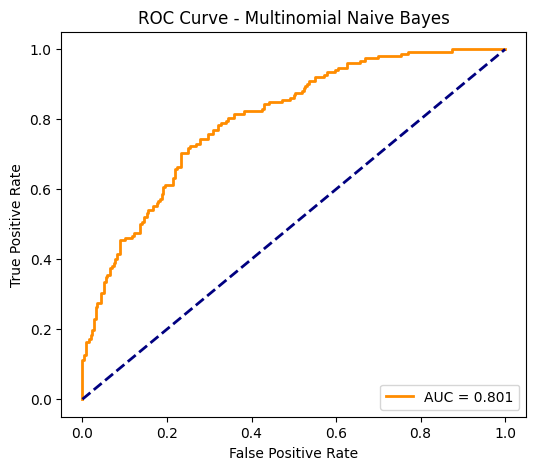


📌 Model: Random Forest
Accuracy: 0.7647058823529411
Confusion Matrix:
 [[238  18]
 [ 78  74]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.93      0.83       256
           1       0.80      0.49      0.61       152

    accuracy                           0.76       408
   macro avg       0.78      0.71      0.72       408
weighted avg       0.77      0.76      0.75       408



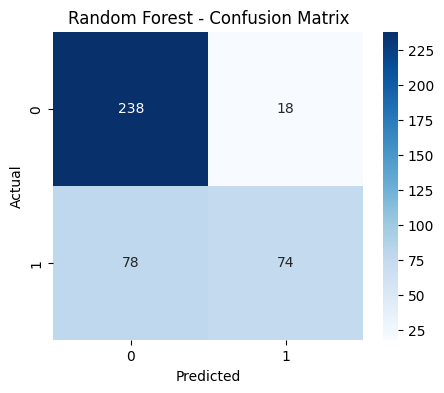

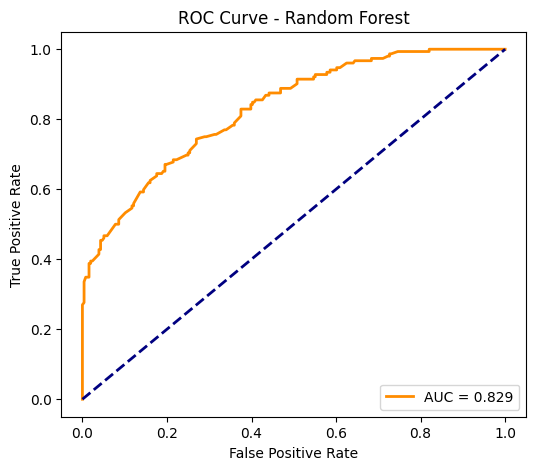


📌 Model: XGBoost


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:36:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.7696078431372549
Confusion Matrix:
 [[231  25]
 [ 69  83]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83       256
           1       0.77      0.55      0.64       152

    accuracy                           0.77       408
   macro avg       0.77      0.72      0.73       408
weighted avg       0.77      0.77      0.76       408



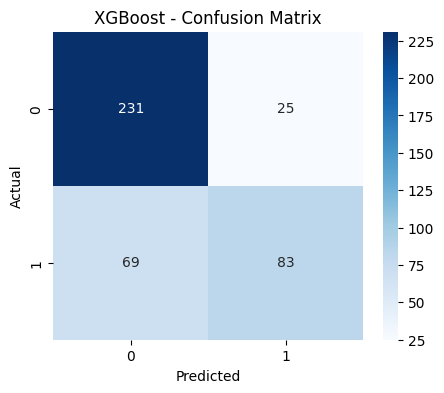

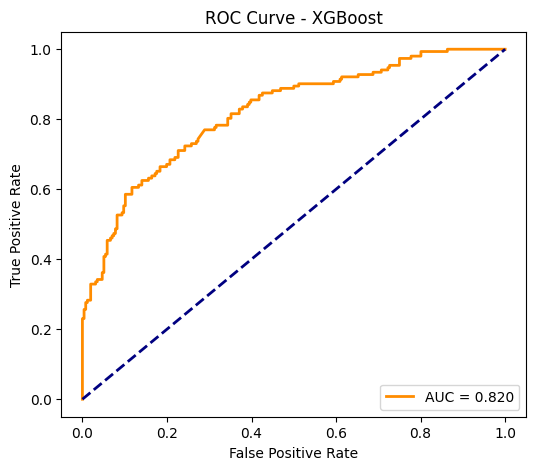

In [ ]:
train_and_evaluate(LogisticRegression(max_iter=1000), "Logistic Regression")
train_and_evaluate(MultinomialNB(), "Multinomial Naive Bayes")
train_and_evaluate(RandomForestClassifier(n_estimators=100), "Random Forest")
train_and_evaluate(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), "XGBoost")